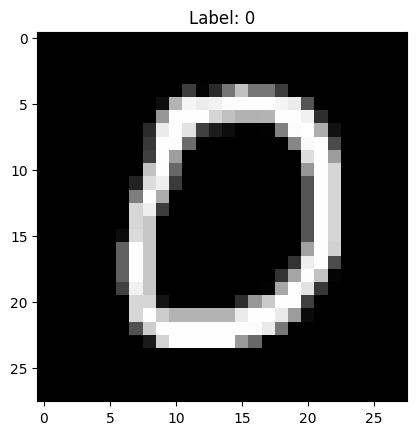

In [5]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import onnx

transform = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./train/data', train=False, transform=transform,download=True),
                                        batch_size=1000, shuffle=False)
# Extract a single image from the validation set
data_iter = iter(test_loader)
images, labels = next(data_iter)
image = images[10].numpy().squeeze()
label = labels[10].item()

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [6]:
import numpy as np
from engine_compile import Model
from engine_compile import FLOAT, INT

mod = Model("train/model.onnx", FLOAT)
mod.init_model()
with open("engineDialect/test/Engine/PythonOutput.mlir", "w+") as f:
    f.write(mod.translate(image.flatten()))

In [7]:
from engine import Model
mod = Model("train/model.onnx")

res = list(mod.infer(image).flatten())
print(res)

[0]


In [8]:
def traverse(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f'Key: {key}')
            traverse(value)
    elif isinstance(obj, list):
        for item in obj:
            traverse(item)
    else:
        print(f'Value: {obj}')
